 ## Implementação do segundo algoritmo
 ### Diagnóstico de TEPT
 #### Modelo Logístico Binário
 Variáveis quantitativas

In [1]:
import pandas as pd
import numpy as np

# Importa as bibliotecas Pandas e Numpy.

In [2]:
df = pd.read_csv('tept_2.csv')
df

# Exibe dataset atribuído a df.

,crit_a,crit_b,crit_c,crit_d,crit_e,tept
0,0,0,2,6,3,0
1,3,3,1,3,3,1
2,3,4,2,3,3,1
3,2,3,0,4,0,0
4,0,2,0,2,3,0
...,...,...,...,...,...,...
49995,2,1,1,3,2,1
49996,1,2,2,4,2,1
49997,2,1,0,4,5,0
49998,3,3,2,5,4,1


In [3]:
df['tept'].value_counts().sort_index()

# Frequência de casos negativos e positivos de TEPT, identificados como 0 e 1, respectivamente.

0    21462
1    28538
Name: tept, dtype: int64

In [4]:
df.info()

# Exibe um resumo dos dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   crit_a  50000 non-null  int64
 1   crit_b  50000 non-null  int64
 2   crit_c  50000 non-null  int64
 3   crit_d  50000 non-null  int64
 4   crit_e  50000 non-null  int64
 5   tept    50000 non-null  int64
dtypes: int64(6)
memory usage: 2.3 MB


In [5]:
X = df.drop(['tept'], axis=1)
y = df['tept']

# Armazena em X todas as colunas do dataset, exceto tept;
# Armazena em y a coluna tept que será utilizada como rótulo.

In [6]:
X

,crit_a,crit_b,crit_c,crit_d,crit_e
0,0,0,2,6,3
1,3,3,1,3,3
2,3,4,2,3,3
3,2,3,0,4,0
4,0,2,0,2,3
...,...,...,...,...,...
49995,2,1,1,3,2
49996,1,2,2,4,2
49997,2,1,0,4,5
49998,3,3,2,5,4


In [7]:
y

0        0
1        1
2        1
3        0
4        0
        ..
49995    1
49996    1
49997    0
49998    1
49999    1
Name: tept, Length: 50000, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Importação da biblioteca que será utilizada para a criação e avaliação do modelo.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
from scipy.special import expit

# Importa bibliotecas que serão utilizadas na visualização dos dados.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Divide o dataset em conjuntos de treinamento (80%) e teste (20%), considerando a definição de X e y feita anteriormente.

In [11]:
modelo2 = LogisticRegression()

# Define o modelo de regressão logística.

In [12]:
modelo2.fit(X_train, y_train)

# Treina o modelo com os dados de treinamento.

LogisticRegression()

In [13]:
y_pred = modelo2.predict(X_test)

# Faz previsões com os dados de teste e armazena o resultado (em uma array) na variável y_pred.

In [14]:
y_prob = modelo2.predict_proba(X_test)[:, 1]

# Probabilidades preditas da classe 1.

In [15]:
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')

# Avalia e exibe a precisão do modelo treinado.

Acurácia do modelo: 0.8173


In [16]:
mc = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(mc)

# Cria e exibe uma matriz de confusão (avaliação do desempenho do modelo em relação a cada classe real e prevista).

Matriz de confusão:
[[3297 1028]
 [ 799 4876]]


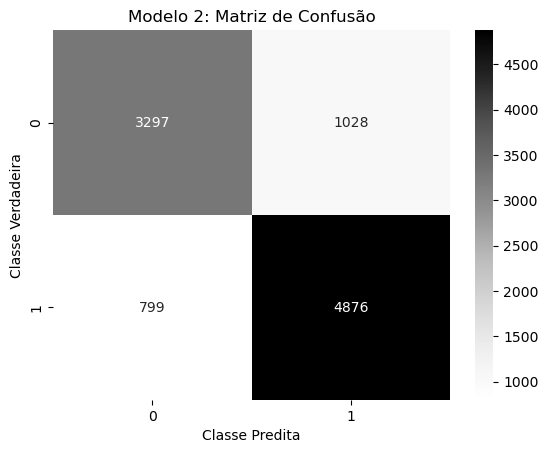

In [17]:
sns.heatmap(mc, annot=True, fmt='d', cmap='Greys')
plt.title('Modelo 2: Matriz de Confusão')
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.savefig('modelo2_mc.png')
plt.show()

In [18]:
report = classification_report(y_test, y_pred)
print('Relatório de classificação:')
print(report)

# Cria e exibe um relatório de classificação com métricas de desempenho do modelo e de cada classe.

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4325
           1       0.83      0.86      0.84      5675

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



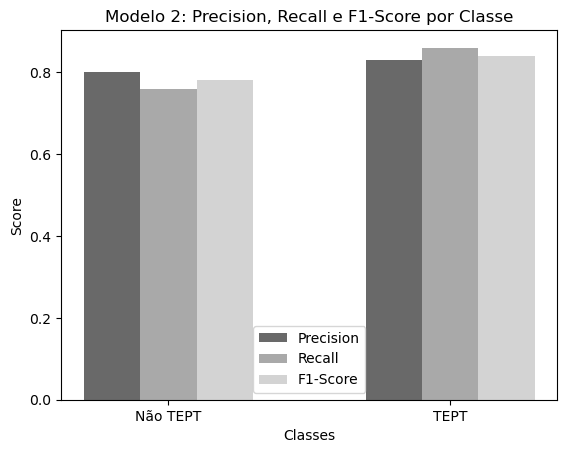

In [19]:
classes = ['Não TEPT', 'TEPT']
precision = [0.80, 0.83]
recall = [0.76, 0.86]
f1_score = [0.78, 0.84]

eixo_x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
ax.bar(eixo_x - width, precision, width, label='Precision', color='dimgrey')
ax.bar(eixo_x, recall, width, label='Recall', color='darkgrey')
ax.bar(eixo_x + width, f1_score, width, label='F1-Score', color='lightgrey')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Modelo 2: Precision, Recall e F1-Score por Classe')
ax.set_xticks(eixo_x)
ax.set_xticklabels(classes)
ax.legend()

plt.savefig('modelo2_metricas.png')
plt.show()

# Cria um gráfico de barras com as métricas obtidas no relatório de classificação.

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcula curva ROC.

In [21]:
roc_auc = auc(fpr, tpr)

# Calcula AUC.

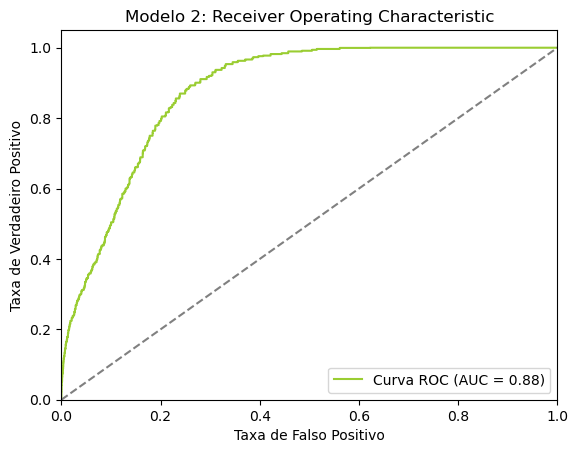

In [22]:
plt.figure()
plt.plot(fpr, tpr, color='yellowgreen', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Modelo 2: Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('modelo2_roc.png')
plt.show()

# Visualização da curva ROC.

In [23]:
y_pred2 = (y_prob >= 0.60).astype(int)

# Cutoff de 0,60.

In [26]:
acuracia2 = accuracy_score(y_test, y_pred2)
print(f'Acurácia do modelo: {acuracia2}')

# Avalia e exibe a precisão do modelo treinado para cutoff de 0,60.

Acurácia do modelo: 0.7861


In [25]:
y_pred3 = (y_prob >= 0.70).astype(int)

# Cutoff de 0,70.

In [27]:
acuracia3 = accuracy_score(y_test, y_pred3)
print(f'Acurácia do modelo: {acuracia3}')

# Avalia e exibe a precisão do modelo treinado para cutoff de 0,60.

Acurácia do modelo: 0.7418


In [28]:
print(f'Intercepto do modelo: {modelo2.intercept_}')

Intercepto do modelo: [-7.27401472]


In [29]:
print(f'Coeficientes do modelo: {modelo2.coef_}')

Coeficientes do modelo: [[0.54074139 0.23723607 2.50827184 0.41814318 0.70737879]]


In [30]:
print(f'Probabilidades preditas: {y_prob}')

Probabilidades preditas: [0.4714069  0.1432296  0.43257396 ... 0.10487203 0.71629482 0.87450255]


In [31]:
import statsmodels.api as sm

# Importa a biblioteca Statsmodels.

In [32]:
X_train_sm = sm.add_constant(X_train)

# Adiciona uma constante (intercepto) ao modelo.

In [33]:
modelo2_sm = sm.Logit(y_train, X_train_sm).fit()

# Treino do modelo utilizando Statsmodels.

Optimization terminated successfully.
         Current function value: 0.429543
         Iterations 7


In [34]:
print(modelo2_sm.summary())

                           Logit Regression Results                           
Dep. Variable:                   tept   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39994
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.3710
Time:                        15:42:06   Log-Likelihood:                -17182.
converged:                       True   LL-Null:                       -27315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.2789      0.089    -82.117      0.000      -7.453      -7.105
crit_a         0.5411      0.014     38.762      0.000       0.514       0.568
crit_b         0.2374      0.012     19.461      0.0